## 1주차 과제
### 연속적인 코로나 확진자 수 제일 많은 날 찾기

In [ ]:
#알고리즘 : 입력받은 문자열을 "0"을 기준으로 split 한 뒤 이중 for 문을 이용하여 연속적인 확진자수 덧셈하여 비교

def solution(confirmed_case):
    answer = 0
    splited_case = confirmed_case.split("0")
    
    for continuous in splited_case:
        sum_daily = 0
        for daily in continuous:
            if ('0' <= daily and '9' >= daily):
                sum_daily += ord(daily) - ord('0')
            elif ('a' <= daily and 'z' >= daily):
                sum_daily += ord(daily) - ord('a') + 10
        if (sum_daily > answer):
            answer = sum_daily
    return answer

: 

In [2]:
value = ["0", "01101c30010024052m4a00b0c00504112113", "011011511000014101000f2sf001133", "00covid0000038050f0f0f00011a121102"]
max = "z"*10000
for i in value:
	print(solution(i))
print(solution(max))

0
43
60
98
350000


## 2nd week assignment

### car number check

In [113]:
#알고리즘 : 입력 문자열애서 필요한 숫자를 슬라이싱하여 저장, 저장된 수를 소수인지 판별, 소수일 경우 몇번째 소수인지 카운팅

# def prime_check(num):
#     if (num == 2):
#         return (True)
#     elif (num < 2 or num % 2 == 0):
#         return (False)
#     for i in range(2, num):
#         if (i * i > num):
#             break
#         if (num % i == 0):
#             return (False)
#     return (True)

# def solution(car_number):
#     answer = 1
#     pre_num = int(car_number[:3])
#     rear_num = int(car_number[-4:-1])
#     last_num = int(car_number[-1:])

#     if (last_num == 0):
#         return (0)
    
#     chk_num = (pre_num + rear_num) // last_num
#     if (((pre_num + rear_num) / last_num) - chk_num >= 0.5):
#         chk_num += 1
#     if (prime_check(chk_num) == False):
#         return (0)
#     for i in range(2, chk_num):
#         if (prime_check(i)):
#             answer += 1

#     return (answer)
    

#### 차량 넘버 ver2

In [61]:
#알고리즘 : 문자열에서 요구조건에 맞게 숫자 설정, 소수 인지 판단 후 소수일 경우 몇번 쨰 소수인지 카운트

def prime_check(num):
    if (num == 2):
        return (True)
    elif (num < 2 or num % 2 == 0):
        return (False)
    sq_num = int(num ** (1/2)) + 1
    for i in range(2, sq_num):
        if (num % i == 0):
            return (False)
    return (True)

def solution(car_number):
    chk_num = int((((int(car_number[:3]) + int(car_number[-4:-1]))) / int(car_number[-1:])) + 0.5)
    if not prime_check(chk_num):
        return (0)
    answer = 1
    for i in range(2, chk_num):
        if (prime_check(i)):
            answer += 1
    return (answer)
    

In [75]:
value = ["000가0231", "999가9981", "102나1079", "114더2228"]

for i in value:
    print("answer :", solution(i))

answer : 9
answer : 302
answer : 9
answer : 0


### 3week assignmnet

In [152]:
#알고리즘 : N이 100ml 단위인지 체크, N의 단위 조정 후 n에서 내림차순으로 나누어 마실 수 있는지 여부 체크

def solution_1(N):
    if (N == 0 or N % 100) : return (0)
    elif (N == 100) : return (1)
    answer = 1
    n = N // 100
    half_n = (n // 2 + 1) if n % 2 else (n // 2)
    for i in range(half_n, 0, -1):
        sum_to_i = (i * (i + 1)) // 2
        if (sum_to_i < n):
            break
        elif (sum_to_i == n):
            answer += 1
            break
        drink = 0
        for j in range(i, 0, -1):
            drink += j
            if (drink > n):
                break
            elif (drink == n):
                answer += 1
                break
    return (answer)
            

In [73]:
##ver 2. 
def bin_search_des_arr(num, arr):
    l= 0
    r = len(arr) - 1
    if (num > arr[l] or num < arr[r]):
        return (False)
    while (l <= r):
        mid = (l + r) // 2
        if (arr[mid] == num):
            return (True)
        elif (arr[mid] < num):
            if (arr[mid - 1] > num): return (False)
            r = mid - 1
        else: #(arr[mid] > num)
            if (arr[mid + 1] < num): return (False)
            l = mid + 1
    return (False)

def solution_2(N):
    if (N == 0 or N % 100) : return (0)
    elif (N == 100) : return (1)
    answer = 1
    n = N // 100
    half_n = (N // 200 + 1) if N % 200 else (N // 200)
    list_half_n = list(i * (i + 1) // 2 for i in range(half_n, 0, -1))
    print("list_half_n ok ")
    print("half_n: ", half_n)
    # print(list_half_n)
    for i in list_half_n:
        find_val = i - n
        if (find_val < 0): break
        if find_val == 0 or bin_search_des_arr(find_val, list_half_n):
            answer += 1
    return (answer)


In [173]:
print("solution1: ", solution(10000000000))


solution1:  9


In [88]:
print("solution2: ", solution_2(1500))

list_half_n ok 
half_n:  8
solution2:  4


In [81]:
#ver3. chatGPT

def solution_3(N):
    if N < 100 or N % 100:
        return 0
    answer = 0
    n = N // 100
    for i in range(1, n+1):
        remaining_drinks = n - i*(i+1)//2
        if remaining_drinks < 0:
            break
        if remaining_drinks % i == 0:
            answer += 1
    return answer

In [156]:
solution_3(2000)

2

In [2]:
#알고리즘: N이 100ml 단위가 아닌지 체크 후 단위 조정, for 루프에서 i명이 나눠 마실 수 있는지 확인

def solution(N):
    if N == 0 or N % 100: return (0)
    answer = 1
    n = N // 100
    for i in range(2, n): # i는 나눠마시는 사람 수
        remaining_drink = n - (i * (i + 1) // 2)
        if (remaining_drink < 0): break
        if (remaining_drink == 0 or remaining_drink % i == 0): # i명이 나눠 마실때 100ml(1)씩 더마시는 경우일때 i만큼 간격이 차이나기 때문에 i로 나눈 나머지가 0이면 위치 이동을 통해 가능
            if (remaining_drink == 0):
                print("0i:",i, "명", 100)
            else:
                print("i:",i, "명",(remaining_drink // i + 1) * 100)
            answer += 1 
    return (answer)

In [4]:
solution(10000000000)

i: 5 명 1999999800
i: 25 명 399998800
i: 125 명 79993800
i: 512 명 19505700
i: 625 명 15968800
i: 2560 명 3778300
i: 3125 명 3043800
i: 12800 명 141300


9

### 4week's assignment


In [13]:
#알고리즘: 첫번쨰 for 문 - 뒷사람과의 등급비교, 두번째 for 문 - 앞사람과의 등급비교

def solution(rating):
    len_rating = len(rating)
    if not (len_rating): return (0)
    elif (len_rating == 1): return (1)
    candy_list = [1] * len_rating
    if (rating[0] > rating[1]):
        candy_list[0] += 1
    for i in range(1, len_rating - 1):
        if (rating[i] > rating[i - 1]):
            candy_list[i] = candy_list[i - 1] + 1
    if (rating[-1] > rating[-2]):
        candy_list[-1] = candy_list[-2] + 1
    for j in range(len_rating - 2, 0, -1):
        if (rating[j] > rating[j + 1] and candy_list[j] < candy_list[j + 1] + 1):
            candy_list[j] = candy_list[j + 1] + 1
    print(candy_list)
    return (sum(candy_list))

In [16]:
print(solution([1,1,1,1,1,1]))
print(solution([0]))
print(solution([1,2,2]))
print(solution([1,0,1,2,1]))
print(solution([1,0,2,6,5,2,1]))

[1, 1, 1, 1, 1, 1]
6
1
[1, 2, 1]
4
[2, 1, 2, 3, 1]
9
[2, 1, 2, 4, 3, 2, 1]
15


### 5th week's assignment

In [1]:
#알고리즘: front 모양을 side 길이만큼 확장 후 side 와 top 모양에 없는 건 비우기

def impossible_case(front, side, top):
    if not len(front) or not len(side):
        return (True)
    if (len(top)):
        for t in top:
            if not (type(t) == list) or not (len(t)):
                return (True)
    else:
        return (True)
    if not (max(front) == max(side)):   # 블럭의 높이 수 체크
        return (True)
    elif not (len(front) == len(top)):  # front 폭과 top 가로폭 체크
        return (True)
    max_top = max(max(i) for i in top)
    if not (max_top == len(side)):      # side 폭과 top_max(=위에서 봤을 때 뒤로 제일 많이 나간 곳) 체크
        return (True)
    return (False)

def solution(front, side, top):
    if (impossible_case(front, side, top)):
        return (0)
    stacked_block = []
    for _ in range(0, len(side)):
        stacked_block += [list(front)]

    for i in range(0, len(stacked_block)):
        row = stacked_block[i]
        if (max(row) > side[i]):
            for col in range(0, len(front)):
                if (row[col] > side[i]):
                    row[col] = side[i]

    for col in range(0, len(top)):
        col_min = min(top[col]) - 1
        col_max = max(top[col]) - 1
        for row in range(0, len(stacked_block)):
            if (row < col_min or row > col_max or not row + 1 in top[col]):
                stacked_block[row][col] = 0
    
    answer = 0
    for r_block in stacked_block:
        answer += sum(r_block)
    print(stacked_block)
    return (answer)
        

In [2]:
print(solution([1,2,1],[2,2],[[1], [1,2], [2]]))
print(solution([1,2,2],[2,2],[[1], [1,2], [2]]))
print(solution([2,2],[2,2,1],[[2,3], [1,2]]))
print(solution([1,2,2,2], [3,3],[[1],[1],[1,2],[2]]))
print(solution([1,2,3,4,5], [5,4,3,2,1], [[1],[1,2],[1,2,3],[1,2,3,4],[1,2,3,4,5]]))
print(solution([1,2,3,4,5], [5,4,3,2,1], [[1,2,3,4,5], [1,2,3,4],[1,2,3],[1,2],[1]]))
print(solution([3,3,3],[3,3,3],[[1,2,3],[1,3,],[1,2,3]]))
print(solution([1,1,1,1,1],[1,1,1,1,1],[[1,2,3,4,5],[1,3,5],[1,2,3,4,5],[1,3,5],[1,2,3,4,5]]))

[[1, 2, 0], [0, 2, 1]]
6
[[1, 2, 0], [0, 2, 2]]
7
[[0, 2], [2, 2], [1, 0]]
7
0
[[1, 2, 3, 4, 5], [0, 2, 3, 4, 4], [0, 0, 3, 3, 3], [0, 0, 0, 2, 2], [0, 0, 0, 0, 1]]
42
[[1, 2, 3, 4, 5], [1, 2, 3, 4, 0], [1, 2, 3, 0, 0], [1, 2, 0, 0, 0], [1, 0, 0, 0, 0]]
35
[[3, 3, 3], [3, 0, 3], [3, 3, 3]]
24
[[1, 1, 1, 1, 1], [1, 0, 1, 0, 1], [1, 1, 1, 1, 1], [1, 0, 1, 0, 1], [1, 1, 1, 1, 1]]
21


### 6th assignmnet

In [135]:
#알고리즘: dna를 전사 후 1~6 번째 오픈리딩프레임에서 M ~ _ 사이 최대 길이들을 비교

def make_triplet_code():
    first_base = second_base = third_base = ['U', 'C', 'A', 'G']
    code = []
    for f in first_base:
        for s in second_base:
            for t in third_base:
                code.append(f + s + t)
                
    triplet_code = {'_': []}
    for i in range(ord('A'), ord('Z') + 1):
        triplet_code[chr(i)] = []
    for c in range(1, len(code) + 1):
        if (1 <= c <= 2):
            triplet_code['F'].append(code[c - 1])
        elif (3 <= c <= 4) or (17 <= c <= 20):
            triplet_code['L'].append(code[c - 1])
        elif (5 <= c <= 8) or (45 <= c <= 46):
            triplet_code['S'].append(code[c - 1])
        elif (9 <= c <= 10):
            triplet_code['Y'].append(code[c - 1])
        elif (13 <= c <= 14):
            triplet_code['C'].append(code[c - 1])
        elif (16 == c):
            triplet_code['W'].append(code[c - 1])
        elif (21 <= c <= 24):
            triplet_code['P'].append(code[c - 1])
        elif (25 <= c <= 26):
            triplet_code['H'].append(code[c - 1])
        elif (27 <= c <= 28):
            triplet_code['Q'].append(code[c - 1])
        elif (29 <= c <= 32) or (47 <= c <= 48):
            triplet_code['R'].append(code[c - 1])
        elif (33 <= c <= 35):
            triplet_code['I'].append(code[c - 1])
        elif (c == 36):
            triplet_code['M'].append(code[c - 1])
        elif (37 <= c <= 40):
            triplet_code['T'].append(code[c - 1])
        elif (41 <= c <= 42):
            triplet_code['N'].append(code[c - 1])
        elif (43 <= c <= 44):
            triplet_code['K'].append(code[c - 1])
        elif (49 <= c <= 52):
            triplet_code['V'].append(code[c - 1])
        elif (53 <= c <= 56):
            triplet_code['A'].append(code[c - 1])
        elif (57 <= c <= 58):
            triplet_code['D'].append(code[c - 1])
        elif (59 <= c <= 60):
            triplet_code['E'].append(code[c - 1])
        elif (61 <= c <= 64):
            triplet_code['G'].append(code[c - 1])
        else:
            triplet_code['_'].append(code[c - 1])
    delete_key = []
    for key, value in triplet_code.items():
        if not (len(value)):
            delete_key.append(key)
    for k in delete_key:
        del triplet_code[k]

    return (triplet_code)

def transcription(dna_seq):
    rna = ""
    for c in dna_seq:
        if (c == "T"):
            rna += "A"
        elif (c == "A"):
            rna += "U"
        elif (c == "G"):
            rna += "C"
        elif (c == "C"):
            rna += "G"
        else:               # dna_seq에 T A G C 외의 것이 있으면 예외 처리
            return ("")
    return (rna[::-1])

def open_reading_frame(rna, triplet_code, start):
    amino_acid = ""
    start_codon = False
    stop_codon = False
    for i in range(start, len(rna), 3):
        code = rna[i: i + 3]
        for key, val in triplet_code.items():
            if (code in val):
                amino_acid += key
                if key == 'M': 
                    start_codon = True
                elif key == '_': 
                    if (start_codon): stop_codon = True
                break
    if (start_codon and stop_codon):
        return (amino_acid)
    else:                               # amino_acid 에 M~~~_가 없으면 예외처리
        return ""

def protein_len(amino_acid):
    protein_len = -1
    s = 0

    while (s < len(amino_acid)):
        if (amino_acid[s] == 'M'):
            for e in range(s + 1, len(amino_acid)):
                if (amino_acid[e] == '_'):
                    if (protein_len < e - s):
                        protein_len = e - s
                    s = e
                    break
        s += 1
    return (protein_len)

def solution(dna_seq):
    triplet_code = make_triplet_code()
    rna = transcription(dna_seq.upper())
    answer = -1
    if not (len(rna)):
        return (answer)

    for i in range(0, 6):
        amino_acid = open_reading_frame(rna, triplet_code, i)
        if not (len(amino_acid)): continue
        max_len = protein_len(amino_acid)
        if (answer < max_len):
            answer = max_len
    
    return (answer)

In [136]:
print(solution("TGGTTAAGCTTTCATTCACATTGA"))
# print(solution("TGGTTAAGCTTTCATTCACATTGACATTTA"))
print(solution("tggttaagctttcattcacattga"))
# print(solution("CCTCACTTTTGATTCATCATT"))
# print(solution("TTATTGCAATTGG"))
# print(solution(""))
# print(solution("ABCD"))
# print(solution("abcd"))
# print(solution("TTGTT"))
print(solution("CATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATCATTTA"))

3
3
-1


### week_9

In [1]:
#알고리즘 : penalty를 적용하여 Edit Distance를 활용

def setting_table(src, dest):
    table = list()
    for _ in range(len(src) + 1):
        table.append(list([0] * (len(dest) + 1)))
    for col in range(1, len(dest) + 1):
        table[0][col] = col
    for row in range(1, len(src) + 1):
        table[row][0] = row
    return (table)

def solution(src, dest, pen_1, pen_2):
    table = setting_table(src, dest)
    src = src.lower()
    dest = dest.lower()
    for row in range(1, len(src) + 1):
        src_c = src[row - 1]
        for col in range(1, len(dest) + 1):
            dest_c = dest[col - 1]
            if (src_c == dest_c):
                table[row][col] = table[row - 1][col - 1]
            else:
                optimal = min(table[row][col - 1] + pen_1, table[row - 1][col] + pen_1, table[row - 1][col - 1] + pen_2)
                table[row][col] = optimal

    return (table[len(src)][len(dest)])
    

In [3]:
print(solution("strong", "stone", 1, 1))
print("----")
print(solution("strong", "stone", 1, 3))
print("----")
print(solution("Honda", "Hyundai", 1, 1))
print(solution("Honda", "hyundai", 1, 1))
print("----")
print(solution("Honda", "", 1, 1))
print("----")
print(solution("", "", 1, 1))
print("----")
print(solution("", "hyundai", 1, 0))

2
----
3
----
3
3
----
5
----
0
----
7


## 의생명정보학 실습


In [11]:
import numpy as np

generations = 100
N = 100
p =0.7

afs = np.zeros(generations)
afs[0] = p
for j in range(1, generations):
    afs[j] = np.random.binomial(2*N, afs[j]) / (2*N)

(0.0, 1.0)

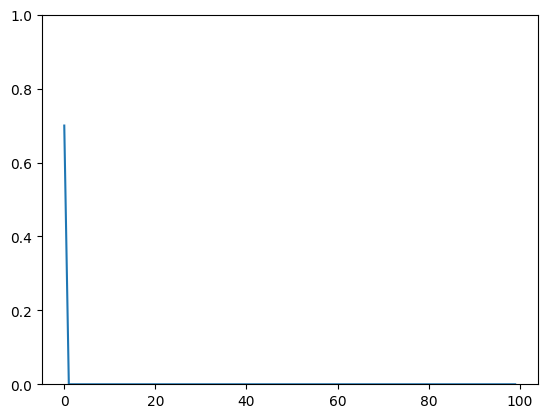

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=range(generations), y=afs)
plt.ylim(0,1)

### 10th alogrithm assignment

In [1]:
#알고리즘 : 다항식 곱셈을 이중 for 문을 통해 구현

def case_len_one(f, g):
    if (f[0] == 0):
        return ([0])
    elif (f[0] == 1):
        return (g)
    q = list([0] * len(g))    
    for i in range(len(g)):
        q[i] = g[i] * f[0]
    return (q)

def solution(f, g):
    if (len(f) == 1):
        return (case_len_one(f, g))
    elif (len(g) == 1):
        return (case_len_one(g, f))

    q = list([0] * (len(f) + len(g) - 1))
    if (len(f) - f.count(0) > len(g) - g.count(0)):
        f, g = g, f
    for i in range(len(f)):
        if (f[i] == 0): continue
        for j in range(len(g)):
            if (g[j] == 0): continue
            q[i + j] += f[i] * g[j]
    return (q)

In [6]:
# solution([1, -1], [1,1,1])
# solution([0], [0])
# solution([1, 2, -1], [1, 0, 0, 2])
# solution([1]*100000000, [2])
# solution([0], [1,2]*1000000)
# solution([0], [1,2,3,4,5]*1000000000)

### 11th algorithm assignment

In [28]:
#알고리즘: radix sort를 활용해서 정렬 후 연속된 점수 차이 최대값 계산

def sorted_check(arr):
    for i in range(1, len(arr)):
        if (arr[i] < arr[i - 1]):
            return (False)
    return (True)

def max_diff(arr):
    diff = 0
    for i in range(1, len(arr)):
        temp = arr[i] - arr[i - 1]
        if (diff < temp):
            diff = temp
    return (diff)

def radix_sort(arr):                                            # 자리수 :k, 입력: n, 진수: r
    quotient = arr                                              
    while (sum(quotient)):                                      # O(k)
        remainder = [i % 10 for i in quotient]                  #   O(n)
        quotient = [i // 10 for i in quotient]                  #   O(n)
        temp = [],[],[]
        r_list = []
        
        if (min(remainder) == max(remainder)):
            continue
        
        for r in range(min(remainder), max(remainder) + 1):     #   O(r)
            if (r in remainder):
                r_list.append(r)
        
        for r in r_list:                                        #   O(r) 
            for n in range(0, len(arr)):                        #       O(n)
                if (r == remainder[n]):
                    temp[0].append(arr[n])
                    temp[1].append(remainder[n])
                    temp[2].append(quotient[n])

        arr = temp[0]
        remainder = temp[1]
        quotient = temp[2]
                                                                # O(krn)
    return (arr)


def solution(rating):
    if (len(rating) < 2):
        return (0)
    if not (sorted_check(rating)):
        if (sorted_check(rating[::-1])):
            rating = rating[::-1]
        else:
            rating = radix_sort(rating)
    # print(rating)
    return (max_diff(rating))
    

In [31]:
import random
print(solution([40, 70, 100, 20]))
print(solution([40]))
print(solution([60,10,60,90,70,40,80]))
print(solution([1,5,7,6,2,4,8,6,2,17,1,89]))

print(solution([1,65,12,56,9,2,1,549,7892,21,65,9,9,12,31,54,9,1,23,45,7,89,2,2,489,156]))
print(solution([1,1,1,1]))
print(solution([10,20,30,40,50]))
print(solution([50,40,30,20,10]))
# rand_num = []
# for _ in range(100000000):
#     rand_num.append(random.randrange(0, 101))



30
0
30
72
7343
0
10
10


In [30]:
# solution(rand_num)

1

In [1]:
#의생명정보학 실습

import re

s = 'AGTCAGTCAGGGGTCAGGTCAGTCAGTCAGTCGG'
re.findall('[AGTC]{3}[G]{2}', s)

['TCAGG', 'TCAGG', 'GTCGG']

In [3]:
def find_everything(pattern, string):
    pattern = re.compile(pattern)
    pos = 0
    m = pattern.search(string, pos)
    while m is not None:
        yield m
        pos = m.start() + 1
        m = pattern.search(string, pos)

In [5]:
find_everything('[AGTC]{3}[G]{2}', s)

<generator object find_everything at 0x10d1a8a50>

### 12th week algorithm assignmnet

In [71]:
#알고리즘 : 

def split_rectangle(coordinate):
    temp_a = {"x_left": coordinate[0], "x_right": coordinate[2], "y_bottom": coordinate[1], "y_top": coordinate[3]}
    temp_b = {"x_left": coordinate[4], "x_right": coordinate[6], "y_bottom": coordinate[5], "y_top": coordinate[7]}
    if (temp_a["x_left"] > temp_b["x_left"]):
        return (temp_b, temp_a)
    return (temp_a, temp_b)

def case_null(left_rec, right_rec):
    if (left_rec["y_top"] < right_rec["y_bottom"]):
        return (True)
    elif (left_rec["y_bottom"] > right_rec["y_top"]):
        return (True)
    elif (left_rec["x_right"] < right_rec["x_left"]):
        return (True)
    return (False)

def case_point(left_rec, right_rec):
    if (left_rec["x_right"] == right_rec["x_left"]):
        if (left_rec["y_top"] == right_rec["y_bottom"] or left_rec["y_bottom"] == right_rec["y_top"]):
            return (True)
    return (False)

def case_line(left_rec, right_rec):
    if (left_rec["y_top"] == right_rec["y_bottom"] or left_rec["y_bottom"] == right_rec["y_top"]):
        if (left_rec["x_left"] <= right_rec["x_right"] < left_rec["x_right"]):
            return (True)
    elif (left_rec["x_right"] == right_rec["x_left"]):
        if (left_rec["y_bottom"] <= right_rec["y_bottom"] < left_rec["y_top"] or \
            left_rec["y_bottom"] <= right_rec["y_top"] < left_rec["y_top"]):
            return (True)
    return (False)

def solution(coordinate):
    left_rec, right_rec = split_rectangle(coordinate)
    # print(left_rec)
    # print(right_rec)
    if (case_null(left_rec, right_rec)):
        return (0)
    elif (case_point(left_rec, right_rec)):
        return (1)
    elif (case_line(left_rec, right_rec)):
        return (2)
    return (3)

In [76]:
print(solution([1,2,3,5,3,5,9,10]))
print(solution([3,5,9,10,1,2,3,5]))

print(solution([3,5,9,10,5,4,8,11]))
print(solution([5,4,8,11,3,5,9,10]))

print(solution([1,2,3,5,9,3,12,7]))
print(solution([9,3,12,7,1,2,3,5]))

print(solution([3,5,9,10,9,3,12,7]))
print(solution([9,3,12,7,3,5,9,10]))


print(solution([3,5,9,10,0,3,3,5]))

print(solution([3,5,9,10,5,0,8,5]))

1
1
3
3
0
0
2
2
1
2
